In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_pickle('./data.pkl')
data.head(10)

Symbols,AAPL,MSFT,^GSPC
2012-08-03,87.957146,29.750000,1390.989990
2012-08-06,88.935715,29.950001,1394.229980
2012-08-07,88.701431,30.260000,1401.349976
2012-08-08,88.551430,30.330000,1402.219971
2012-08-09,88.675713,30.500000,1402.800049
2012-08-10,88.814285,30.420000,1405.869995
2012-08-13,90.000000,30.389999,1404.109985
2012-08-14,90.241432,30.129999,1403.930054
2012-08-15,90.118568,30.200001,1405.530029
2012-08-16,90.905716,30.780001,1415.510010


In [23]:
# calculating the short-window (20) moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.head()

Symbols,AAPL,MSFT,^GSPC
2012-08-03,NaN,NaN,NaN
2012-08-06,NaN,NaN,NaN
2012-08-07,NaN,NaN,NaN
2012-08-08,NaN,NaN,NaN
2012-08-09,NaN,NaN,NaN


In [24]:
# Calculating the long-window (100) moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.head()

Symbols,AAPL,MSFT,^GSPC
2012-08-03,NaN,NaN,NaN
2012-08-06,NaN,NaN,NaN
2012-08-07,NaN,NaN,NaN
2012-08-08,NaN,NaN,NaN
2012-08-09,NaN,NaN,NaN


In [25]:
long_rolling.tail()

Symbols,AAPL,MSFT,^GSPC
2016-12-26,111.7931,59.0630,2176.628792
2016-12-27,111.8776,59.1138,2177.500190
2016-12-28,111.9652,59.1635,2178.244490
2016-12-29,112.0532,59.2095,2178.879189
2016-12-30,112.1296,59.2515,2179.426990


## Trading strategies - basics

In [26]:
# relative returns
returns = data.pct_change(1)
returns.head(10)

Symbols,AAPL,MSFT,^GSPC
2012-08-03,NaN,NaN,NaN
2012-08-06,0.011126,0.006723,0.002329
2012-08-07,-0.002634,0.010351,0.005107
2012-08-08,-0.001691,0.002313,0.000621
2012-08-09,0.001404,0.005605,0.000414
2012-08-10,0.001563,-0.002623,0.002188
2012-08-13,0.013350,-0.000986,-0.001252
2012-08-14,0.002683,-0.008555,-0.000128
2012-08-15,-0.001362,0.002323,0.001140
2012-08-16,0.008735,0.019205,0.007101


In [27]:
# log returns 
# 1st the log of the prices is taken and the difference of consecutive observations
log_returns = np.log(data).diff()
log_returns.head(10)

Symbols,AAPL,MSFT,^GSPC
2012-08-03,NaN,NaN,NaN
2012-08-06,0.011064,0.006700,0.002327
2012-08-07,-0.002638,0.010297,0.005094
2012-08-08,-0.001693,0.002311,0.000621
2012-08-09,0.001403,0.005589,0.000414
2012-08-10,0.001561,-0.002626,0.002186
2012-08-13,0.013262,-0.000987,-0.001253
2012-08-14,0.002679,-0.008592,-0.000128
2012-08-15,-0.001362,0.002321,0.001139
2012-08-16,0.008697,0.019023,0.007075


### Plot returns

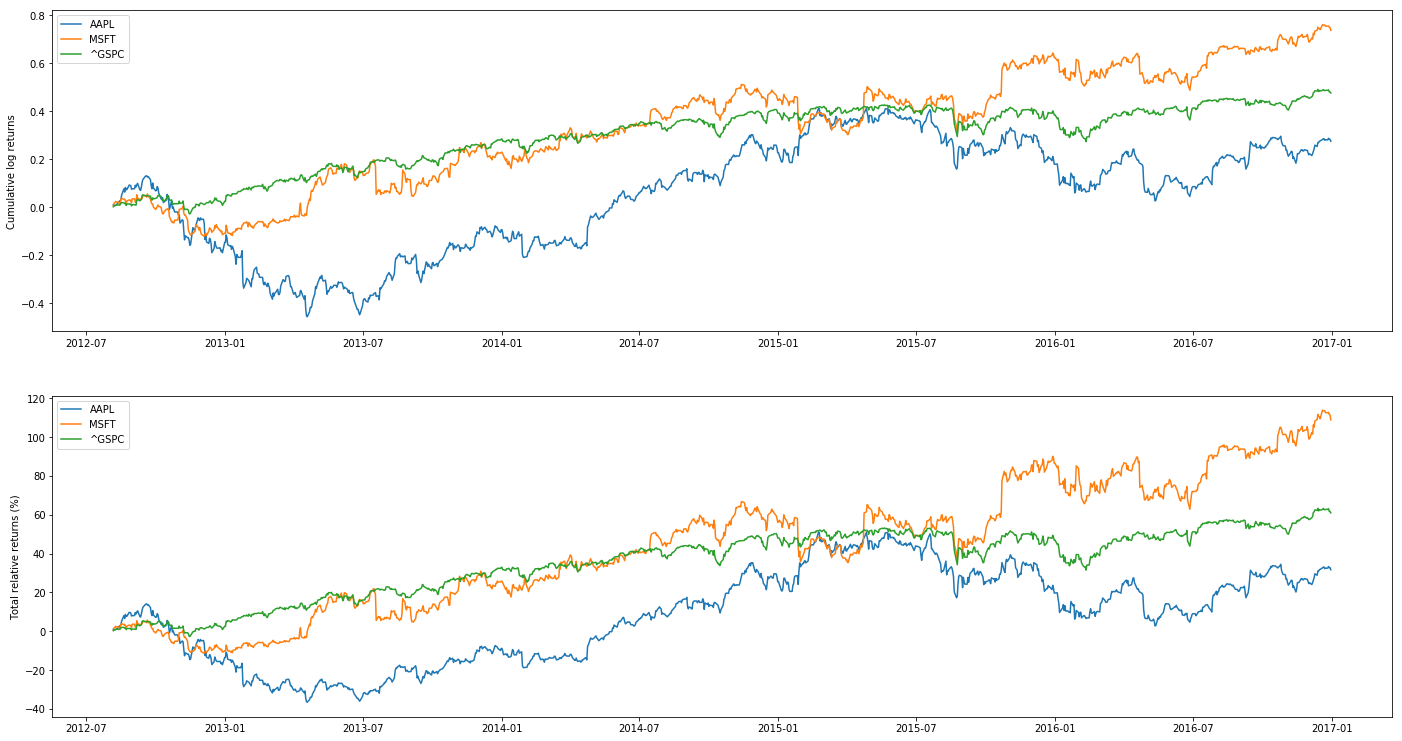

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,13))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

### Quantitative trading strategy

In [29]:
# last day returns
r_t = log_returns.tail(1)
r_t

Symbols,AAPL,MSFT,^GSPC
2016-12-30,-0.007826,-0.012156,-0.004648


In [30]:
# transpose frame
r_t = r_t.T

In [31]:
r_t

,2016-12-30 00:00:00
Symbols,
AAPL,-0.007826
MSFT,-0.012156
^GSPC,-0.004648


In [32]:
# weights 
w = pd.DataFrame(1/3 , index=r_t.index, columns=r_t.columns)
w

,2016-12-30 00:00:00
Symbols,
AAPL,0.333333
MSFT,0.333333
^GSPC,0.333333


In [33]:
# total log return for portfolio
portfolio_log_return = w.T.dot(r_t)
portfolio_log_return

,2016-12-30 00:00:00
2016-12-30,-0.00821


### Example

In [34]:
# Wappl = Wmsft =Wgspc = 1/3
# W - weights matrix TxK, where Tth row is row of vector w(t).T 
W = pd.DataFrame(1/3, index=data.index, columns=data.columns)
W.tail()

Symbols,AAPL,MSFT,^GSPC
2016-12-26,0.333333,0.333333,0.333333
2016-12-27,0.333333,0.333333,0.333333
2016-12-28,0.333333,0.333333,0.333333
2016-12-29,0.333333,0.333333,0.333333
2016-12-30,0.333333,0.333333,0.333333


In [35]:
# R - log-returns matrix
log_returns.head()

Symbols,AAPL,MSFT,^GSPC
2012-08-03,NaN,NaN,NaN
2012-08-06,0.011064,0.006700,0.002327
2012-08-07,-0.002638,0.010297,0.005094
2012-08-08,-0.001693,0.002311,0.000621
2012-08-09,0.001403,0.005589,0.000414


In [36]:
# porfolio returns calculations
# interests only in diag matrix, which is where the dates 
# in the row-index and the col-index match
var = W.dot(log_returns.T)
var.head().iloc[:, 0:5]

,2012-08-03 00:00:00,2012-08-06 00:00:00,2012-08-07 00:00:00,2012-08-08 00:00:00,2012-08-09 00:00:00
2012-08-03,NaN,0.006697,0.004251,0.000413,0.002468
2012-08-06,NaN,0.006697,0.004251,0.000413,0.002468
2012-08-07,NaN,0.006697,0.004251,0.000413,0.002468
2012-08-08,NaN,0.006697,0.004251,0.000413,0.002468
2012-08-09,NaN,0.006697,0.004251,0.000413,0.002468


In [37]:
# extract the diagonal
portfolio_log_return = pd.Series(np.diag(var), index=log_returns.index)
portfolio_log_return.tail()

2016-12-26    0.000000
2016-12-27    0.003070
2016-12-28   -0.005753
2016-12-29   -0.000660
2016-12-30   -0.008210
Freq: B, dtype: float64

### Cumulative log returns and the total relative returns for the portfolio

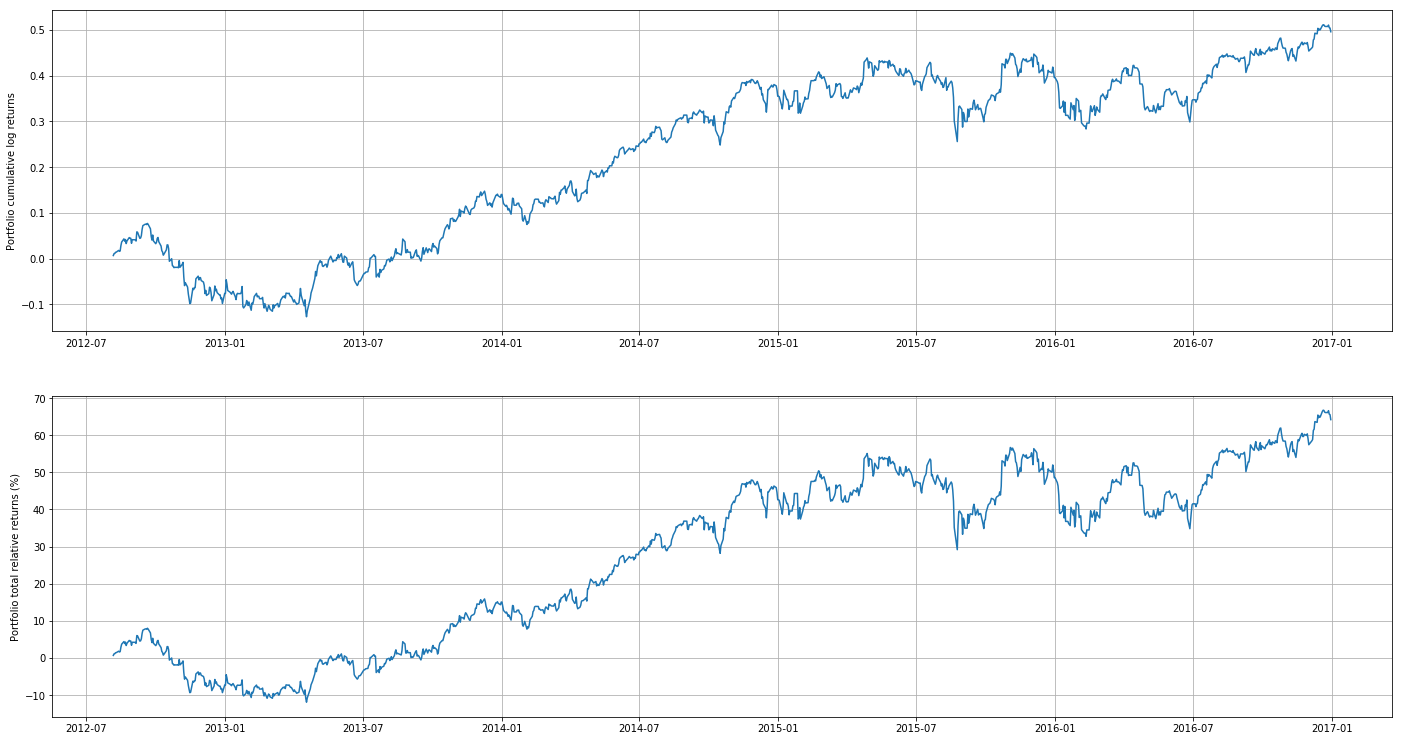

In [38]:
total_relative_returns = (np.exp(portfolio_log_return.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 13))
ax1.grid(True)
ax1.plot(portfolio_log_return.index, portfolio_log_return.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.grid(True)
ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

#### As we can see afore, simple investing strategy would yield a total return of over 65% per 5 years

In [39]:
# calculating the time-related parameters
weekdays = 52 * 5
days_in_simulation = len(data.index)
years_in_simulation = days_in_simulation/weekdays

# portfolio return
total_return = total_relative_returns[-1]

# avg portfolio return
avg_return = (1 + total_return) ** (1 / years_in_simulation) - 1

In [40]:
print('Total portfolio return : {}%'.format(100 * round(total_return, 5)))
print('Average yearly return : {}%'.format(100 * round(avg_return, 5)))

Total portfolio return : 64.197%
Average yearly return : 11.853%
